In [1]:
import pandas as pd
import numpy as np
#for text pre-processing
import re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
# bag of words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for word embedding
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\win10\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np                  #linear algebra
import pandas as pd                 # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     #For Visualisation
%matplotlib inline
import seaborn as sns               #For better Visualisation
from bs4 import BeautifulSoup       #For Text Parsing

In [3]:
df = pd.read_csv('HASOC-Hindi2021(train).csv')

In [4]:
df.head()

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,NONE
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,NONE
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,NONE
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,OFFN
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,NONE


# Class Distribution

NOT    3161
HOF    1433
Name: task_1, dtype: int64


C:\Users\win10\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='task_1'>

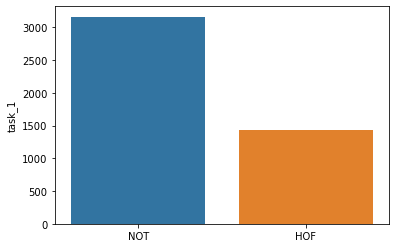

In [5]:
import seaborn as sns
x=df['task_1'].value_counts()
print(x)
sns.barplot(x.index,x)

In [6]:
df.isna().sum()

Unnamed: 0    0
_id           0
tweet_id      0
text          0
task_1        0
task_2        0
dtype: int64

In [7]:
df.shape

(4594, 6)

In [8]:
# Names Of columns in our dataset
df.columns

Index(['Unnamed: 0', '_id', 'tweet_id', 'text', 'task_1', 'task_2'], dtype='object')

In [9]:
# There are null values in location column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4594 entries, 0 to 4593
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4594 non-null   int64 
 1   _id         4594 non-null   object
 2   tweet_id    4594 non-null   object
 3   text        4594 non-null   object
 4   task_1      4594 non-null   object
 5   task_2      4594 non-null   object
dtypes: int64(1), object(5)
memory usage: 215.5+ KB


In [10]:
# There are 5 unique sentiment types in our dataset
df['task_1'].value_counts()

NOT    3161
HOF    1433
Name: task_1, dtype: int64

# Going deeper into tweet and sentiment.

In [11]:
df[df['task_1']=='NOT']

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,NOT,NONE
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,NOT,NONE
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,NOT,NONE
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,NOT,NONE
8,3664,60c5d7495659ea5e55df1ad1,hi_hasoc_2021_3664,#MuddaGaramHai चुनाव नतीजों के बाद बंगाल में ज...,NOT,NONE
...,...,...,...,...,...,...
4588,3871,60c5d7495659ea5e55df1c93,hi_hasoc_2021_3871,"@bachpanamitabh आज बंगाल, पुडुचेरी, तमिलनाडु, ...",NOT,NONE
4589,2481,60c5d7495659ea5e55df13ff,hi_hasoc_2021_2481,सिवान के पुर्व सांसद मरहुम मो सहाबुदीन के रहस्...,NOT,NONE
4590,3711,60c5d7495659ea5e55df1b13,hi_hasoc_2021_3711,वर्ष 1989-1990 के दौरान कश्मीर के हिंदुओं के स...,NOT,NONE
4591,3113,60c5d7495659ea5e55df1678,hi_hasoc_2021_3113,#किसानों_का_मोदी_को_धोबीपटका #ResignPMmodi htt...,NOT,NONE


In [12]:
df[df['task_1']=='HOF']

,Unnamed: 0,_id,tweet_id,text,task_1,task_2
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,HOF,OFFN
5,5407,60c5d7495659ea5e55df13af,hi_hasoc_2021_5410,@Sandeep_News_24 बिहार की आम जनता को बहुत ही न...,HOF,HATE
6,5848,60c5d7495659ea5e55df1b22,hi_hasoc_2021_5852,यही तेरी असलियत है कि चोरी रोज करेगा खेत मे ले...,HOF,OFFN
7,5761,60c5d7495659ea5e55df1c1c,hi_hasoc_2021_5765,भोजपुरी का 2 टके का सिंगर किसी के लड़की का नाम...,HOF,HATE
9,3331,60c5d7495659ea5e55df1701,hi_hasoc_2021_3331,@anushka_s2 मूर्ख लड़की,HOF,OFFN
...,...,...,...,...,...,...
4574,4652,60c5d7495659ea5e55df0a2d,hi_hasoc_2021_4653,अब दाढ़ी कटवायेगा या झोला उठाकर हिमालय पर जाय...,HOF,OFFN
4576,5237,60c5d7495659ea5e55df123d,hi_hasoc_2021_5240,वो वैसे भी अरबों की नाजायज औलाद है। https://t....,HOF,OFFN
4582,5698,60c5d7495659ea5e55df16f4,hi_hasoc_2021_5701,तेरे नाम का तो में कुत्ता भी ना पलू कुत्तों क...,HOF,OFFN
4583,3405,60c5d7495659ea5e55df1992,hi_hasoc_2021_3405,I think we should stop saying anything about K...,HOF,OFFN


In [13]:
pd.isnull(df["task_1"])

0       False
1       False
2       False
3       False
4       False
        ...  
4589    False
4590    False
4591    False
4592    False
4593    False
Name: task_1, Length: 4594, dtype: bool

In [14]:
print("Shape of the DataFrame:",df.shape)
df.sample(5)

Shape of the DataFrame: (4594, 6)


,Unnamed: 0,_id,tweet_id,text,task_1,task_2
2990,4166,60c5d7495659ea5e55df1ce1,hi_hasoc_2021_4166,"""MODI MEANS TERROR"" #नरेंद्र_मोदी_ग्लोबल_पप्प...",HOF,OFFN
327,1640,60c5d7495659ea5e55df1033,hi_hasoc_2021_1640,यह सभ तो बिकाऊ है यह क्या बोलेंगे #BengalBurn...,NOT,NONE
113,561,60c5d7495659ea5e55df0804,hi_hasoc_2021_561,हमारे उम्मीदवार का यह दुर्दशा किया है टोलाबाज ...,HOF,HATE
1262,1221,60c5d7495659ea5e55df0c96,hi_hasoc_2021_1221,Keep this rage. Drag modi in the streets and ...,HOF,OFFN
1893,2071,60c5d7495659ea5e55df1260,hi_hasoc_2021_2071,पूर्व सांसद को अपने घर की जमीन पर दफन होने भी ...,NOT,NONE


In [15]:
def custom_encoder(df):
    df.replace(to_replace ="NOT", value =0, inplace=True)
    df.replace(to_replace ="HOF", value =1, inplace=True)
    

In [16]:
custom_encoder(df['task_1'])

In [17]:
task1_unique = df['task_1'].unique()
print(task1_unique)

[0 1]


# Word Count

In [18]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
print(df[df['task_1']==1]['word_count'].mean()) #Hate and Offensive
print(df[df['task_1']==0]['word_count'].mean()) #Non-Hate-Offensive

28.568736915561757
25.137931034482758


# Character Count

In [19]:
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
print(df[df['task_1']==1]['char_count'].mean()) #Hate and Offensive
print(df[df['task_1']==0]['char_count'].mean()) #Non-Hate-Offensive


176.7997208653175
180.59253400822524


# Unique Word Count

In [20]:
df['unique_word_count'] = df['text'].apply(lambda x: len(set(str(x).split())))
print(df[df['task_1']==1]['unique_word_count'].mean()) #Hate and Offensive
print(df[df['task_1']==0]['unique_word_count'].mean()) #Non-Hate-Offensive

25.808094905792046
23.091743119266056


# Plotting word-count per tweet

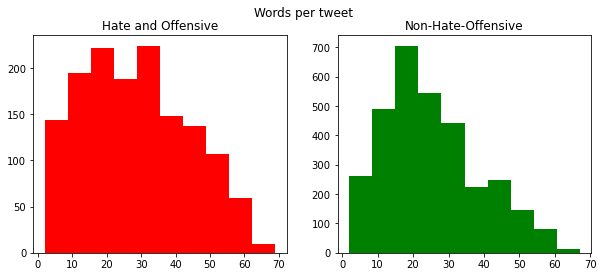

In [21]:
%matplotlib inline
from matplotlib import pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df[df['task_1']==1]['word_count']
ax1.hist(train_words,color='red')
ax1.set_title('Hate and Offensive')
train_words=df[df['task_1']==0]['word_count']
ax2.hist(train_words,color='green')
ax2.set_title('Non-Hate-Offensive')
fig.suptitle('Words per tweet')
plt.show()

# Common text preprocessing

In [22]:
#convert to lowercase, strip and remove punctuations
def preprocess(text):
    text = text.lower() 
    text=text.strip()  
    text=re.compile('<.*?>').sub('', text) 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)  
    text = re.sub('\s+', ' ', text)  
    text = re.sub(r'\[[0-9]*\]',' ',text) 
    text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d',' ',text) 
    text = re.sub(r'\s+',' ',text) 
    return text

 
# STOPWORD REMOVAL
def stopword(string):
    a= [i for i in string.split() if i not in stopwords.words('english')]
    return ' '.join(a)
#LEMMATIZATION
# Initialize the lemmatizer
wl = WordNetLemmatizer()
 
# This is a helper function to map NTLK position tags
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
# Tokenize the sentence
def lemmatizer(string):
    word_pos_tags = nltk.pos_tag(word_tokenize(string)) # Get position tags
    a=[wl.lemmatize(tag[0], get_wordnet_pos(tag[1])) for idx, tag in enumerate(word_pos_tags)] # Map the position tag and lemmatize the word/token
    return " ".join(a)
    
  


In [23]:
df.head()

,Unnamed: 0,_id,tweet_id,text,task_1,task_2,word_count,char_count,unique_word_count
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,0,NONE,24,265,24
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,0,NONE,38,212,35
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,0,NONE,15,99,14
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,1,OFFN,7,42,7
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,0,NONE,33,144,31


In [24]:
#FINAL PREPROCESSING
def finalpreprocess(string):
    return lemmatizer(stopword(preprocess(string)))
df['clean_text'] = df['text'].apply(lambda x: finalpreprocess(x))
df.head()

,Unnamed: 0,_id,tweet_id,text,task_1,task_2,word_count,char_count,unique_word_count,clean_text
0,998,60c5d7495659ea5e55df0b7b,hi_hasoc_2021_998,@rssurjewala #Hindus DYING #HindusLivesMatter ...,0,NONE,24,265,24,rssurjewala hindu die hinduslivesmatter kindat...
1,4049,60c5d7495659ea5e55df1b73,hi_hasoc_2021_4049,सब लोग इतने पैसे डोनेट ही कर रहे हैं फिर भी आम...,0,NONE,38,212,35,सब लग इतन पस डनट ह कर रह ह फर भ आम आदम क सलडर ...
2,1757,60c5d7495659ea5e55df0d1b,hi_hasoc_2021_1757,शेर-ए- सिवान शहाबुद्दीन साहब से रिश्ता क्या ل...,0,NONE,15,99,14,शर ए सवन शहबददन सहब स रशत कय لا إله إلا الله م...
3,5175,60c5d7495659ea5e55df0e45,hi_hasoc_2021_5178,@AskAnshul आसमानी किताब के नाजायज औलाद है।,1,OFFN,7,42,7,askanshul आसमन कतब क नजयज औलद ह
4,1825,60c5d7495659ea5e55df0ee1,hi_hasoc_2021_1825,@Shikha0222 इसे कहते हैं दोगला पंती जिस सपा की...,0,NONE,33,144,31,shikha इस कहत ह दगल पत जस सप क दम पर स क सफर क...


# Vectorization

In [25]:
df['clean_text_tok']=[nltk.word_tokenize(i) for i in df['clean_text']] #convert preprocessed sentence to tokenized sentence
model = Word2Vec(df['clean_text_tok'],min_count=1)  

w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector

#for converting sentence to vectors/numbers from word vectors result by Word2Vec
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = len(next(iter(word2vec.values())))

    def fit(self, X, y):
        return self

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec]
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

<ipython-input-25-06dbae151de9>:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  w2v = dict(zip(model.wv.index2word, model.wv.syn0))  #combination of word and its vector


# Splitting of Trainning dataset into Test and Train

In [26]:
#SPLITTING THE TRAINING DATASET INTO TRAINING AND VALIDATION
 
X_train, X_val, y_train, y_val = train_test_split(df["clean_text"],
                                                  df["task_1"],
                                                  test_size=0.2,
                                                  shuffle=True)
X_train_tok= [nltk.word_tokenize(i) for i in X_train]  #for word2vec
X_val_tok= [nltk.word_tokenize(i) for i in X_val]      #for word2vec

tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train) #tfidf runs on non-tokenized sentences unlike word2vec

X_val_vectors_tfidf = tfidf_vectorizer.transform(X_val)  

#Word2vec
# Fit and transform
modelw = MeanEmbeddingVectorizer(w2v)
X_train_vectors_w2v = modelw.transform(X_train_tok)
X_val_vectors_w2v = modelw.transform(X_val_tok)

# Building ML Model

# Logistic Regression(tf-idf)

In [27]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)

lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_val_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       615
           1       0.76      0.56      0.65       304

    accuracy                           0.80       919
   macro avg       0.79      0.74      0.75       919
weighted avg       0.79      0.80      0.79       919

Confusion Matrix: [[562  53]
 [133 171]]
AUC: 0.8395913564398801


# Naive Bayes

In [28]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)  #model

#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_val_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_val_vectors_tfidf)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc)  

              precision    recall  f1-score   support

           0       0.71      0.99      0.83       615
           1       0.89      0.18      0.30       304

    accuracy                           0.72       919
   macro avg       0.80      0.58      0.56       919
weighted avg       0.77      0.72      0.65       919

Confusion Matrix: [[608   7]
 [249  55]]
AUC: 0.8362270004278989


# Logistic Regression (W2v)

In [29]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression (W2v)
lr_w2v=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_w2v.fit(X_train_vectors_w2v, y_train)  #model

#Predict y value for test dataset
y_predict = lr_w2v.predict(X_val_vectors_w2v)
y_prob = lr_w2v.predict_proba(X_val_vectors_w2v)[:,1]
 

print(classification_report(y_val,y_predict))
print('Confusion Matrix:',confusion_matrix(y_val, y_predict))
 
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
roc_auc = auc(fpr, tpr)
print('AUC:', roc_auc) 

              precision    recall  f1-score   support

           0       0.72      0.94      0.81       615
           1       0.67      0.25      0.37       304

    accuracy                           0.71       919
   macro avg       0.69      0.60      0.59       919
weighted avg       0.70      0.71      0.67       919

Confusion Matrix: [[577  38]
 [227  77]]
AUC: 0.7536317928968763


# Testing Model on Test Dataset

In [30]:
#Testing it on new dataset with the best model Logistic Regression
df_test=pd.read_csv('HASOC_Hindi_2021_Test.csv')  #reading the data
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = lr_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = lr_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['target']= y_predict
print(df_test.head())
final=df_test[['id','tweet_id','target']].reset_index(drop=True)
final.to_csv('submission2.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  target  
0  hemantmkpandya news tvchannel aloksharmaaicc m...      0.794025       1  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ      0.940451       1  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...      0.089722       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...      0.

In [31]:
#Naive bayes
df_test=pd.read_csv('HASOC_Hindi_2021_Test.csv')  #reading the data
df_test['clean_text'] = df_test['text'].apply(lambda x: finalpreprocess(x)) #preprocess the data
X_test=df_test['clean_text'] 
X_vector=tfidf_vectorizer.transform(X_test) #converting X_test to vector
y_predict = nb_tfidf.predict(X_vector)      #use the trained model on X_vector
y_prob = nb_tfidf.predict_proba(X_vector)[:,1]
df_test['predict_prob']= y_prob
df_test['task_1']= y_predict
print(df_test.head())
final=df_test[['tweet_id','task_1']].reset_index(drop=True)
final.to_csv('naive-bayes.csv')

                         id          tweet_id  \
0  60c5d7495659ea5e55df0546   hi_hasoc_2021_5   
1  60c5d7495659ea5e55df0591   hi_hasoc_2021_7   
2  60c5d7495659ea5e55df0622  hi_hasoc_2021_12   
3  60c5d7495659ea5e55df0666  hi_hasoc_2021_13   
4  60c5d7495659ea5e55df067b  hi_hasoc_2021_15   

                                                text  \
0  @hemantmkpandya @news24tvchannel @Aloksharmaai...   
1  वोडाफोन ने एक कुत्ता पाला था बहुत फेमस हुआ   फ...   
2  घंटे दीमक ने जाकर 70 साल के मज़बूत पेड़ को 7 स...   
3  @dmfatehpur हमारे ग्राम पंचायत सिधांव जिला फते...   
4  यह मुझे चैन क्यों नहीं पड़ता एक ही शख़्स था जह...   

                                          clean_text  predict_prob  task_1  
0  hemantmkpandya news tvchannel aloksharmaaicc m...      0.468789       0  
1   वडफन न एक कतत पल थ बहत फमस हआ फर मकश अबन क शक चढ      0.424923       0  
2  घट दमक न जकर सल क मजबत पड क सल म खखल कर दय res...      0.146670       0  
3  dmfatehpur हमर गरम पचयत सधव जल फतहपर उ पर म तल...      0.